In [2]:
from zipfile import ZipFile

In [3]:
file_name = "/content/Dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [7]:
IMAGE_SIZE = [224, 224]
train_path = "Dataset/Train"
valid_path = "Dataset/Test"

In [11]:
vgg19 = VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [14]:
#vgg19.summary()

In [19]:
for layer in vgg19.layers:
  layer.trainable = False

In [20]:
folders  = glob('Dataset/Train/*')

In [21]:
len(folders)

2

In [22]:
x = Flatten()(vgg19.output)

In [23]:
prediction = Dense(len(folders),activation='softmax')(x)
model = Model(inputs=vgg19.input,outputs=prediction)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
 model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 416 images belonging to 2 classes.


In [30]:
training_set

In [31]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [32]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/4
13/13 [==============================] - 355s 28s/step - loss: 1.5958 - accuracy: 0.5168 - val_loss: 1.3410 - val_accuracy: 0.6791
Epoch 2/4
13/13 [==============================] - 351s 28s/step - loss: 0.8700 - accuracy: 0.6274 - val_loss: 0.8635 - val_accuracy: 0.5373
Epoch 3/4
13/13 [==============================] - 352s 28s/step - loss: 0.5600 - accuracy: 0.7212 - val_loss: 0.5356 - val_accuracy: 0.7015
Epoch 4/4
13/13 [==============================] - 354s 28s/step - loss: 0.4109 - accuracy: 0.8053 - val_loss: 0.5869 - val_accuracy: 0.6791


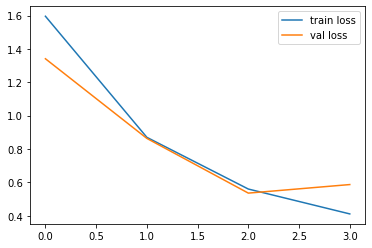

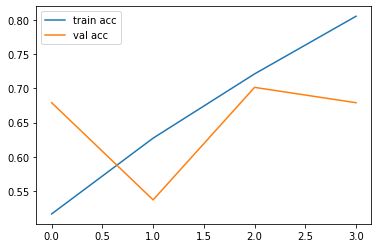

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
y_pred = model.predict(test_set)

In [35]:
y_pred

array([[9.6108806e-01, 3.8911927e-02],
       [9.5601618e-01, 4.3983798e-02],
       [9.0103948e-01, 9.8960534e-02],
       [8.7244958e-01, 1.2755041e-01],
       [8.6234307e-01, 1.3765691e-01],
       [9.5574594e-01, 4.4254024e-02],
       [7.7796078e-01, 2.2203921e-01],
       [8.4384048e-01, 1.5615951e-01],
       [9.7723502e-01, 2.2764958e-02],
       [8.1400055e-01, 1.8599944e-01],
       [9.9963665e-01, 3.6332986e-04],
       [9.9348301e-01, 6.5170331e-03],
       [9.9842668e-01, 1.5733617e-03],
       [9.4531167e-01, 5.4688361e-02],
       [9.8679745e-01, 1.3202523e-02],
       [8.0472565e-01, 1.9527434e-01],
       [6.8977028e-01, 3.1022972e-01],
       [5.9180194e-01, 4.0819800e-01],
       [9.6109456e-01, 3.8905524e-02],
       [9.9861753e-01, 1.3824867e-03],
       [9.5545149e-01, 4.4548515e-02],
       [9.9430496e-01, 5.6950045e-03],
       [9.4287723e-01, 5.7122752e-02],
       [8.1174135e-01, 1.8825862e-01],
       [9.1573960e-01, 8.4260352e-02],
       [9.9514943e-01, 4.

In [36]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [37]:
from tensorflow.keras.preprocessing import image

In [38]:
model = load_model('model_vgg19.h5')

In [41]:
img = image.load_img('Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_112.png',target_size=(224,224))

In [42]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [43]:
x.shape

(224, 224, 3)

In [44]:
x = x/255

In [46]:
import numpy as np

In [47]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [48]:
model.predict(img_data)

array([[0.4090225 , 0.59097743]], dtype=float32)

In [51]:
a = np.argmax(model.predict(img_data),axis=1)

In [52]:
a

array([1])